In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import skimage
from sklearn.cluster import KMeans

C:\Users\trove\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


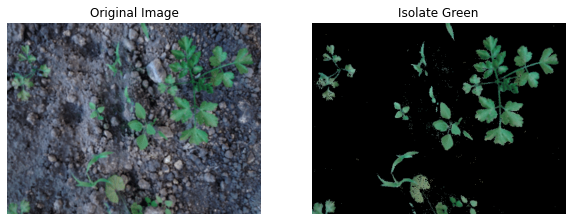

In [2]:
# Read the image
image = cv2.imread('img/img1.png')

# Convert the image from BGR to HSV color space
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the lower and upper bounds for the green color in HSV
lower_green = np.array([30,40,30])
upper_green = np.array([100,255,255])

# Create a mask to isolate the green areas
mask = cv2.inRange(rgb_image, lower_green, upper_green)

# Apply the mask to the original image
green_areas = cv2.bitwise_and(image, image, mask=mask)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# Plot the original
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[0].axis('off')

# Plot masked
axs[1].imshow(green_areas)
axs[1].set_title('Isolate Green')
axs[1].axis('off')

plt.show()

All non-black pixels will now have a value of 255.

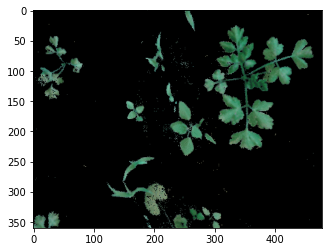

In [3]:
arr = green_areas
plt.figure()
plt.imshow(arr)
plt.show()
for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        for k in range(arr.shape[2]):
            if arr[i, j, k] != 0:
                arr[i, j, k] = 255

(360, 478)


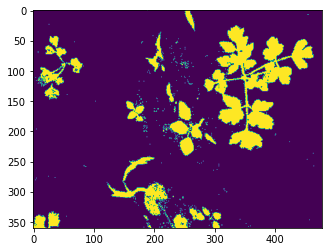

In [4]:
layer1 = arr[:, :, 0]
print(layer1.shape)
plt.figure(); plt.imshow(layer1); plt.show()

Remove Noise

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[237 237 237]
  [237 237 237]
  [237 237 237]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[237 237 237]
  [237 237 237]
  [237 237 237]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[239 239 239]
  [239 239 239]
  [239 239 239]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


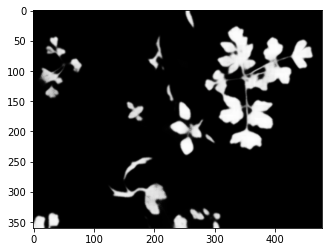

In [6]:
denoised_image = cv2.fastNlMeansDenoisingColored(green_areas, None, h=100, templateWindowSize=7, searchWindowSize=21)
plt.imshow(denoised_image)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


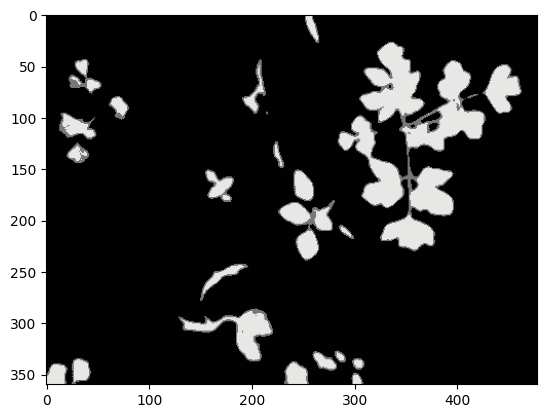

In [93]:
# Reshape the image into a 2D array of pixels
pixels = denoised_image.reshape(-1, 3)

# Define the number of clusters (k)
k = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(pixels)

# Get the labels and reshape them back to the original image shape
labels = kmeans.labels_.reshape(denoised_image.shape[0], denoised_image.shape[1])

# Visualize the segmented image
segmented_image = np.zeros_like(denoised_image)
for i in range(k):
    segmented_image[labels == i] = kmeans.cluster_centers_[i]

plt.figure(); plt.imshow(cv2.cvtColor(segmented_image.astype(np.uint8), cv2.COLOR_RGB2BGR)); plt.show()

In [95]:
np.unique(labels)

array([0, 1, 2])